In [1]:
from PreFRBLE.convenience import *
from PreFRBLE.plot import *
from PreFRBLE.likelihood import *
from PreFRBLE.physics import *


In [2]:
scenario_IGM = {
    'IGM' : ['alpha1-3rd'],
}

scenario_local = {
    'Local' : ['Piro18/wind'],
}

scenario_host = {
    'Host': ['Heesen11/dirty'],
}

scenario1 = {
    'IGM' : ['alpha1-3rd'],
    'Local' : ['Piro18/wind'],   
}
scenario2 = {
    'IGM' : ['alpha9-3rd'],
    'Local' : ['Piro18/wind'],   
}


In [3]:
BayesFactorCombined(DMs=[1000,1100], RMs=[8,10], scenario1=scenario1, scenario2=scenario2, dev=True, force=True, force_full=True)

  0%|          | 0/60 [00:00<?, ?it/s]

redshift_devs 0.3795284070869712
P_dev_region IGM ['alpha1-3rd'] 0.0 0.8164965809277261
P_dev_region Local ['Piro18/wind'] 0.0 3.1622776601683795


/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:750: RuntimeWarning: divide by zero encountered in power
  res =  ( P*np.diff(x)*N )**-0.5
/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:275: RuntimeWarning: invalid value encountered in true_divide
  dev = np.sqrt(dev0 + dev1) / P
  2%|▏         | 1/60 [00:06<06:22,  6.49s/it]

P_dev_convolve 0.0 10064.401735026746 3.1622776601683795 RM
deviations 1147.3359814783141 1151.8813941549315 1149.608687816623 2100.2732151297714
P_dev_region IGM ['alpha1-3rd'] 0.0 0.8164965809277261
P_dev_region Local ['Piro18/wind'] 0.0 3.162277660168379


  2%|▏         | 1/60 [00:09<09:22,  9.54s/it]


KeyboardInterrupt: 

In [8]:
BayesFactor( np.array([1,2,3,4]*2), np.array([3,10,1,0.1]*2), np.array([0.1]*4*2), np.array([0.1]*4*2) )

(64.0, 0.4)

/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:668: RuntimeWarning: divide by zero encountered in power
  res =  ( P*np.diff(x)*N )**-0.5


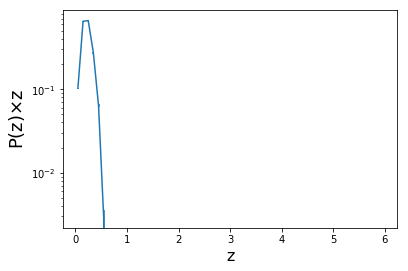

/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:172: RuntimeWarning: invalid value encountered in true_divide
  dev = np.sqrt(dev)/P


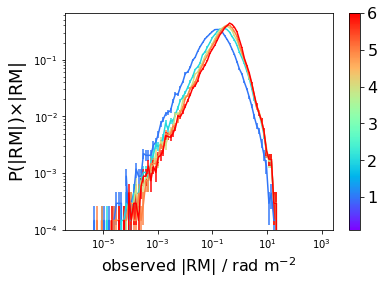

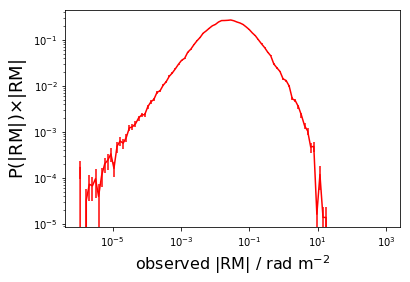

In [13]:
Ps, xs, devs = [], [], []
Pz, zs, devz = GetLikelihood_Redshift( population='SMD', telescope='ASKAP', dev=True  )
PlotLikelihood(  P=Pz, x=zs, dev=devz, measure='z' )
plt.xscale('linear')
plt.show()

measure = 'RM'

fig, ax=  plt.subplots()
for redshift, color in zip( redshift_bins, Rainbow( redshift_bins ) ):
    P, x, dev = GetLikelihood( region='IGM', measure=measure, redshift=redshift, dev=True, model='alpha1-3rd' )
    Ps.append(P)
    xs.append(x)
    devs.append(dev)
    if redshift % 1.0 != 0 :
        continue
    PlotLikelihood(  P=P, x=x, dev=dev, measure=measure, ax=ax, color=color )
Colorbar( x=redshift_bins, ax=ax )

P, x, dev = LikelihoodsAdd( Ps=Ps, xs=xs, devs=devs, weights=Pz*np.diff(zs), dev_weights=devz  )
PlotLikelihood(  P=P, x=x, dev=dev, measure=measure, color=color )


In [11]:
dev

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.47140452, 0.19802951, 0.09072184, 0.05034734,
       0.03045018, 0.02174427, 0.01692244, 0.01453863, 0.01365196,
       0.01367108, 0.0138909 , 0.01523569, 0.01675063, 0.01882608,
       0.02045721, 0.02130313, 0.01829404, 0.01505847, 0.01310975,
       0.01211521, 0.01194418, 0.01243989, 0.01314709, 0.01324881,
       0.01190983, 0.01079584, 0.0104243 , 0.01057003, 0.01045931,
       0.00981454, 0.00928737, 0.00922315, 0.00894821, 0.00849136,
       0.00841436, 0.00813613, 0.00779243, 0.00762116, 0.00728811,
       0.00706454, 0.00679306, 0.00656737, 0.00630956, 0.00607872,
       0.00588307, 0.00568577, 0.00546387, 0.00525788, 0.00505854,
       0.00486735, 0.00471138, 0.00453981, 0.00436386, 0.00417

(2, 10)

In [10]:
with h5.File( likelihood_file_IGM ) as f:
    print( f['primordial/far/4/DM/0.1000'].keys())

<KeysViewHDF5 ['P', 'x']>


/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


<ErrorbarContainer object of 3 artists>

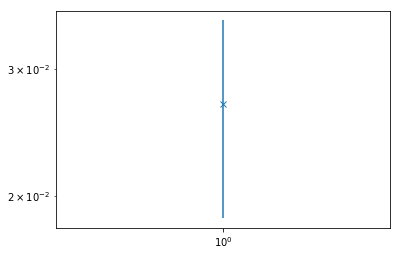

In [90]:
P1 = np.random.rand(10)
P2 = np.random.rand(10)
std1 = 0.1*np.random.rand(10)
std2 = 0.1*np.random.rand(10)

B, std = BayesFactorDeviation( P1, P2, std1, std2 )

plt.loglog()
plt.errorbar( 1, B, yerr=B*std, marker='x' )

/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:750: RuntimeWarning: divide by zero encountered in power
  res =  ( P*np.diff(x)*N )**-0.5
/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/PreFRBLE/likelihood.py:275: RuntimeWarning: invalid value encountered in true_divide
  dev = np.sqrt(dev0 + dev1) / P


P_dev_convolve 0.0 29222.27719690866 15.721848789307213


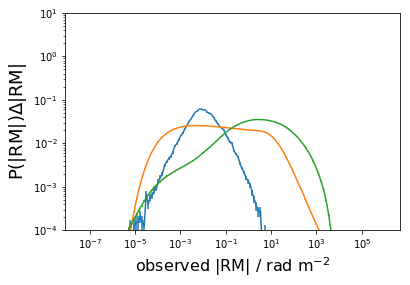

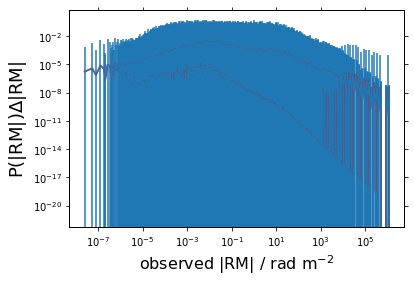

In [12]:
fig, ax = plt.subplots()

redshift = 0.1
measure='RM'
#redshift=1.0

P, x = GetLikelihood_Full( measure=measure, redshift=redshift, **scenario_IGM )
dev = LikelihoodDeviation( P=P, x=x, N=50000)
PlotLikelihood( P=P, x=x, measure='DM', ax=ax, dev=dev, density=False )

P_, x_ = GetLikelihood_Full( measure=measure, redshift=redshift, **scenario_local )
dev_ = LikelihoodDeviation( P=P_, x=x_, N=10**7)
PlotLikelihood( P=P_, x=x_, measure=measure, ax=ax, dev=dev_, density=False)

P_h, x_h = GetLikelihood_Full( measure=measure, redshift=redshift, **scenario_host )
dev_h = LikelihoodDeviation( P=P_h, x=x_h, N=10**6)
PlotLikelihood( P=P_h, x=x_h, measure=measure, ax=ax, dev=dev_h, density=False)


devs = [dev,dev_,dev_h]

P_c, x_c, dev_c = LikelihoodsConvolve( Ps=[P,P_,P_h][:2], xs=[x,x_,x_h][:2], devs=devs[:2], absolute= measure=='RM', shrink=False )
#dev_c = LikelihoodDeviation( P=P_c, x=x_c, N=50000 )

print( 'P_dev_convolve', dev_c.min(), dev_c.max(), np.array(devs).max() )

ax.set_ylim(1e-4,10)
plt.show()
fig, ax = plt.subplots()

PlotLikelihood( P=P_c, x=x_c, measure=measure, dev=dev_c, density=False, ax=ax)
PlotLikelihood( P=P_c, x=x_c, measure=measure, density=False, ax=ax, color='red')
#PlotLikelihood( P=P_c, x=x_c, measure=measure, dev=Deviation2Log( x_c[1:], dev_c*(P_c*np.diff(x_c)) )/(P_c*np.diff(x_c)), density=False)
#print(dev_c)
#ax.set_ylim(1e-4,10)


#x_ =  x[1:]-np.diff(x)/2
#ax.errorbar( x_, P*x_, yerr=std  )
AllSidesTicks(ax)


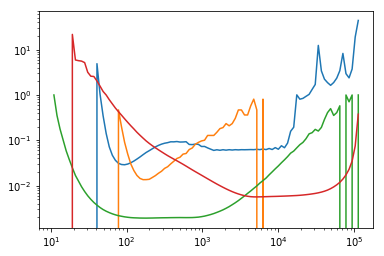

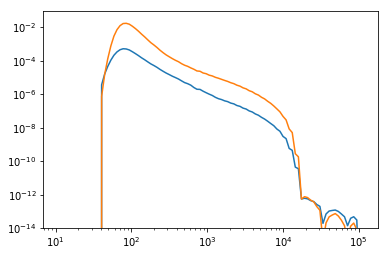

/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


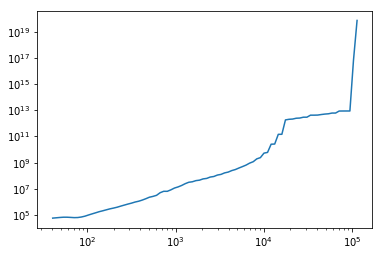

In [8]:
plt.loglog(x_c[1:], dev_c)
plt.loglog(x_c[1:], dev)
plt.loglog(x_c[1:], dev_)
plt.loglog(x_c[1:], dev_h)
#plt.ylim(1,1e2)
plt.show()
plt.loglog(x_c[1:], dev_c*P_c)
plt.loglog(x_c[1:], P_c)

plt.ylim(1e-14,1e-1)
plt.show()
plt.loglog(x_c[1:], 1/dev_c**2/P_c)
plt.show()


In [39]:
def Deviation2Log( x, dev ):
    """ transform 1D linear scaled deviation to 2D log-scaled deviation use in plt.errorbar """
    x_log = np.log10(x)
    dev_log = np.log10(x+dev) - x_log
    return np.array( [ x - 10.**( x_log - dev_log ), 10**( x_log + dev_log ) - x ] )
    

In [29]:
Deviation2Log( x_c[1:], dev_c )/(P_c*np.diff(x_c))

/data/PreFRBLE/venv_PreFRBLE/lib/python3.4/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[           nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan, 5.91140694e+06, 2.01332343e+05,
        1.38775548e+04, 1.17967945e+03, 1.77602743e+02, 5.04965538e+01,
        2.22408517e+01, 1.37192537e+01, 1.16154668e+01, 1.18891756e+01,
        1.47371598e+01, 1.96433855e+01, 2.74919804e+01, 4.06693551e+01,
        5.83125448e+01, 8.71580481e+01, 1.28768699e+02, 1.73330202e+02,
        2.40254914e+02, 3.46882259e+02, 4.70515126e+02, 6.17665169e+02,
        7.52581318e+02, 9.02249274e+02, 1.07841527e+03, 1.17898779e+03,
        1.42549459e+03, 1.56494112e+03, 1.65940505e+03, 1.87184904e+03,
        1.72876587e+03, 1.98963381e+03, 1.95810783e+03, 2.14163993e+03,
        1.89448583e+03, 1.75800912e+03, 1.70608245e+03, 1.32130042e+03,
        1.15557869e+03, 1.22285153e+03, 1.29115728e+03, 1.346132

In [95]:
import healpy as hp

In [96]:
hp.nside2npix( 2**6)

49152